In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
from datetime import datetime
from collections import defaultdict

In [22]:
plt.rcParams['figure.figsize'] = (8,6)

In [4]:
PATH = r'data_clean/'

sec_pupil = 'sections_pupil.csv'
sec_rel = 'sections_relations.csv'
sec_serv = 'sections_services.csv'

books_catalogue = 'books_catalogue.csv'
books_issues = 'books_issues.csv'
books_samples = 'books_samples.csv'
books_readers = 'books_readers.csv'

### Books

In [362]:
books_catalogue_df = pd.read_csv(os.path.join(PATH, books_catalogue), index_col=0)

In [363]:
books_issues_df = pd.read_csv(os.path.join(PATH, books_issues), index_col=0)

In [364]:
books_samples_df = pd.read_csv(os.path.join(PATH, books_samples), index_col=0)

In [365]:
books_readers_df = pd.read_csv(os.path.join(PATH, books_readers), index_col=0)

In [366]:
books_catalogue_df.head()

,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения
0,1,Устинова Татьяна Витальевна,Призрак Канта,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,16+
1,2,NaN,Наука и жизнь,1938-,NaN,Наука. Науковедение,12+
2,3,NaN,Наука и жизнь,2018,NaN,Наука. Науковедение,12+
3,4,NaN,Наука и жизнь,2018,NaN,Наука. Науковедение,12+
4,5,NaN,Наука и жизнь,2018,NaN,Наука. Науковедение,12+


In [367]:
books_issues_df.head()

,ИД выдачи,ИД читателя,Инвентарный номер,Состояние,Year_issue,Month_issue,Duration_issue
0,1,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000
1,2,179,03:0000005761,NaN,2018,4,3 days 00:00:00.000000000
2,3,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000
3,4,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000
4,5,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000


In [368]:
books_samples_df.head()

,ИД Каталожной записи,Инвентарный номер
0,1,09:0000120386
1,1,09:0000152427
2,1,09:0000240622
3,1,09:0000278133
4,1,05:0000257728


In [369]:
books_readers_df.head()

,ID читателя,Age,Month
0,366670,46,10
1,235264,42,6
2,133225,44,1
3,556716,31,1
4,52086,65,8


In [370]:
books_issues_df.shape

(11420807, 7)

In [375]:
books_merged = books_issues_df.merge(books_samples_df, how='left', left_on='Инвентарный номер', right_on='Инвентарный номер')

In [376]:
books_merged.shape

(11424728, 8)

In [377]:
books_merged.head()

,ИД выдачи,ИД читателя,Инвентарный номер,Состояние,Year_issue,Month_issue,Duration_issue,ИД Каталожной записи
0,1,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0
1,2,179,03:0000005761,NaN,2018,4,3 days 00:00:00.000000000,5185.0
2,3,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0
3,4,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0
4,5,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0


In [378]:
books_merged = books_merged.merge(books_catalogue_df, how='left', left_on='ИД Каталожной записи', right_on='ID книги')

In [379]:
books_merged.shape

(11426271, 15)

In [380]:
books_merged.head()

,ИД выдачи,ИД читателя,Инвентарный номер,Состояние,Year_issue,Month_issue,Duration_issue,ИД Каталожной записи,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения
0,1,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN
1,2,179,03:0000005761,NaN,2018,4,3 days 00:00:00.000000000,5185.0,5185.0,NaN,Сказки о солдате,1999,Библиотека русской сказки,Художественная литература ; Фольклор России,NaN
2,3,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN
3,4,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN
4,5,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN


In [381]:
books_merged = books_merged.merge(books_readers_df, how='left', left_on='ИД читателя', right_on='ID читателя')

In [382]:
books_merged.head()

,ИД выдачи,ИД читателя,Инвентарный номер,Состояние,Year_issue,Month_issue,Duration_issue,ИД Каталожной записи,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения,ID читателя,Age,Month
0,1,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,179.0,30.0,1.0
1,2,179,03:0000005761,NaN,2018,4,3 days 00:00:00.000000000,5185.0,5185.0,NaN,Сказки о солдате,1999,Библиотека русской сказки,Художественная литература ; Фольклор России,NaN,179.0,30.0,1.0
2,3,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,179.0,30.0,1.0
3,4,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,179.0,30.0,1.0
4,5,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,179.0,30.0,1.0


In [383]:
books_merged.drop(columns=['ИД Каталожной записи', 'ID читателя'], inplace=True)

In [384]:
books_merged.shape

(11426271, 16)

In [385]:
books_merged.to_csv(os.path.join(PATH, 'books_merged.csv'))

In [386]:
user_item_pair = books_merged[['ИД читателя', 'Название']]

In [387]:
user_item_pair.to_csv(os.path.join('data_algo/user_item_matrix.csv'))

#### Genres, Tags, Names analysis

In [504]:
books_merged.head()

,ИД выдачи,ИД читателя,Инвентарный номер,Состояние,Year_issue,Month_issue,Duration_issue,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения,Age,Month
0,1,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,1.0
1,2,179,03:0000005761,NaN,2018,4,3 days 00:00:00.000000000,5185.0,NaN,Сказки о солдате,1999,Библиотека русской сказки,Художественная литература ; Фольклор России,NaN,30.0,1.0
2,3,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,1.0
3,4,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,1.0
4,5,179,03:0000005767,NaN,2018,4,0 days 00:00:00.000000000,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,1.0


In [505]:
#skip names

In [508]:
df_genres = books_merged[['Жанр']]

In [509]:
df_genres['Genres'] = df_genres['Жанр']

In [511]:
df_genres.drop_duplicates(inplace=True)

In [512]:
df_genres.dropna(inplace=True)

In [515]:
df_genres.head(50)

,Жанр,Genres
0,Художественная литература,Художественная литература
1,Художественная литература ; Фольклор России,Художественная литература ; Фольклор России
19,История России,История России
20,Книжное дело. Общее книговедение,Книжное дело. Общее книговедение
22,Книжное дело. Общее книговедение ; Развивающая...,Книжное дело. Общее книговедение ; Развивающая...
24,Художественная литература ; Российский детектив,Художественная литература ; Российский детектив
39,Психология развития и возрастная психология,Психология развития и возрастная психология
40,Социальная психология,Социальная психология
42,Зоология,Зоология
46,Общие вопросы литературоведения,Общие вопросы литературоведения


In [514]:
df_genres.shape

(6113, 2)

In [521]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.5)
dtm = cv.fit_transform(df_genres['Genres'])

In [522]:
from sklearn.decomposition import LatentDirichletAllocation

In [523]:
LDA = LatentDirichletAllocation(n_components=10,
                               batch_size=256,
                               learning_decay=0.2) #playaround

In [524]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.2,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [525]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['техническим', 'естественнонаучным', 'знаниям', 'общественным', 'школьников', 'по', 'познавательная', 'литература', 'для', 'науки']


THE TOP 15 WORDS FOR TOPIC #1
['общего', 'школа', 'общеобразовательная', 'семейное', 'образования', 'дело', 'воспитание', 'образование', 'право', 'педагогика']


THE TOP 15 WORDS FOR TOPIC #2
['технология', 'языкознания', 'литературоведения', 'кулинария', 'путеводители', 'страноведение', 'путешествия', 'краеведение', 'вопросы', 'общие']


THE TOP 15 WORDS FOR TOPIC #3
['военная', 'живопись', 'целом', 'история', 'политика', 'искусствознание', 'филология', 'архитектура', 'искусства', 'искусство']


THE TOP 15 WORDS FOR TOPIC #4
['сказки', 'язык', 'проза', 'зарубежная', 'российская', 'художественная', 'юношества', 'детей', 'для', 'литература']


THE TOP 15 WORDS FOR TOPIC #5
['науки', 'зарубежных', 'стран', 'теория', 'всемирная', 'целом', 'литературы', 'критика', 'россии', 'история']


THE TOP 15 WORDS FOR TOPIC #6
['мира', 'я

In [897]:
genres_tesaurus = {
    'economics_business':['предприят', 'предприним', 'бизнес', 'экономик', 'финан', 'банк', 'менеджм',],
    'politics':['полит'],
    'poetry_folklor':['фолькл', 'поэз'],
    'detectives':['детектив'],
    'cinema_theatre_art':['игровое', 'кино', 'драматический', 'театр', 'искусст',
                         'живопись', 'архитектура', 'музык', 'скульпт',
                         'эстрад','график', 'цирк'],
    'philosophy_religion_culture':['логика', 'философия', 'религ', 'этик', 'эстет', 'христ', 'ислам', 'будд',
                         'эзотер', 'иуд', 'атеи', 'космого', 'культура'],
    'socio_human':['антропология', 'социальная', 'социо', 'гуманит', 'журналист', 'обществ'],
    'biography':['биогр', 'мемуар'],
    'fantastics_fantasy':['фантаст', 'фэнт'],
    'medicine':['здравоохранение', 'гигиена', 'медицина', 'педиат', 'акуш', 'терапи', 'болезн',
               'физио', 'инфекц', 'диагнос', 'хирур', 'отравл'],
    'history_hronicles':['россии', 'истор', 'военн', 'войск'],
    'countries_journeys':['путеводители', 'страноведение', 'путешествия', 'краеведение',
                         'путешеств'],
    'law':['прав', 'юстиц'],
    'books_philology':['язык', 'филология', 'языкознания', 'литературоведения', 'языкознания',
                      'книж', 'дело', 'библио'],
    'foreign_lang':['иностр'],
    'educational_school':['школа', 'общеобразовательная', 'познавательная', 'энцикл'],
    'pedagogical':['педагог', 'гогик', 'воспитан', 'образован'],
    'psychology':['психол',],
    'hobbies_home_other':['транспорт', 'хозяйст', 'спорт', 'водств'],
    'children':['детей', 'дет', 'юнош', 'семейное', 'сказки', 'комикс'],
    'it':['програм', 'комп', 'робот', 'информ', ],
    'humour_cites':['юмор', 'цитат', 'афор'],
    'horrors':['ужас'],
    'love_sentiment':['любов','сентим'],
    'journals_periodics':['журн', 'периодич'],
    'foreign_fiction':['зарубежн', 'миров'],
    'russian_fiction':['российс', 'публиц', 'проза', 'драма', 'художествен'],
    'common_scince':['биол', 'естественнонауч', 'гео', 'хим', 'логия', 'номия',
                    'наук', 'графия', 'метри', 'веден', 'ботан', 'био','солнеч', 'звезд'],
    'technical_sciense':['технич', 'матем', 'физик', 'алгеб', 'чисел', 'стат', 'энергет',
                        'электр', 'теор', 'механ', 'радио', 'материал', 'прибор', 'метал',
                        'технолог', 'оптика', 'акустик'],
}

In [898]:
def add_cluster(x):
    group = np.nan
    stop = 0
    for key, values in genres_tesaurus.items():
        for val in values:
            if val in x:
                group = key
                stop = 1
                break
        if stop == 1:
            break
    if stop == 0:
        return 'hobbies_home_other'
    return group

In [899]:
df_genres['Genres'] = df_genres['Genres'].apply(lambda x: x.lower())

In [900]:
df_genres['group'] = df_genres['Genres'].apply(lambda x: add_cluster(x))

In [901]:
# df_genres.head(20)

In [902]:
df_genres[df_genres['group'].isna() == True].shape

(0, 3)

In [903]:
df_genres[df_genres['group'].isna() == True].head(50)

,Жанр,Genres,group


In [904]:
genre_group_dict = dict()
for row in df_genres.itertuples():
    genre_group_dict[row[1]] = row[3]

In [905]:
books_merged['Genre_cat'] = books_merged['Жанр'].map(genre_group_dict)

In [906]:
books_merged.head(50)

,ИД выдачи,ИД читателя,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения,Age,Genre_cat,is_novice,is_old
0,1,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
1,2,179,5185.0,NaN,Сказки о солдате,1999,Библиотека русской сказки,Художественная литература ; Фольклор России,NaN,30.0,poetry_folklor,F,N
2,3,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
3,4,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
4,5,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
5,6,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
6,7,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
7,8,163,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,38.0,russian_fiction,F,N
8,9,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,F,N
9,10,232,5456.0,Андреева Наталья Вячеславовна,Москва не принимает,2013,Детектив-загадка,Художественная литература,NaN,80.0,russian_fiction,F,N


In [822]:
books_merged['Состояние'].value_counts() # my fault in mapping. Seems to be not usefull - will fix with issues

Series([], Name: Состояние, dtype: int64)

In [823]:
books_merged.drop(columns=['Инвентарный номер', 'Состояние', 'Month_issue', 'Month'], inplace=True)

In [825]:
books_merged.drop(columns=['Duration_issue'], inplace=True)

In [908]:
def is_novice(x):
    if x in [2018, 2019, 2020]:
        return 'Y'
    else:
        return 'N'

In [909]:
books_merged['is_novice'] = books_merged['Год издания'].apply(lambda x: is_novice(x))

In [829]:
books_merged.drop(columns=['Year_issue'], inplace=True)

In [853]:
def is_old(x):
    try:
        if int(x) < 1991:
            return 'Y'
        else:
            return 'N'
    except ValueError:
        return 'N'

In [854]:
books_merged['is_old'] = books_merged['Год издания'].apply(lambda x: is_old(x))

In [911]:
books_engine = books_merged.copy()

In [926]:
import math

In [929]:
def is_series(x):
    try:
        if math.isnan(x):
            return 'N'
        else:
            return 'Y'
    except TypeError:
        return 'Y'

In [930]:
books_engine['is_series'] = books_engine['Серия'].apply(lambda x: is_series(x))

In [932]:
books_engine.head(20)

,ИД выдачи,ИД читателя,ID книги,Автор,Название,Год издания,Серия,Жанр,Возратные ограничения,Age,Genre_cat,is_novice,is_old,is_series
0,1,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
1,2,179,5185.0,NaN,Сказки о солдате,1999,Библиотека русской сказки,Художественная литература ; Фольклор России,NaN,30.0,poetry_folklor,N,N,Y
2,3,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
3,4,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
4,5,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
5,6,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
6,7,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
7,8,163,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,38.0,russian_fiction,N,N,N
8,9,179,5190.0,Семенова Мария Васильевна,Год Людоеда,2000,NaN,Художественная литература,NaN,30.0,russian_fiction,N,N,N
9,10,232,5456.0,Андреева Наталья Вячеславовна,Москва не принимает,2013,Детектив-загадка,Художественная литература,NaN,80.0,russian_fiction,N,N,Y


In [934]:
books_engine.drop(columns=['Серия', 'Жанр'], inplace=True)

In [937]:
books_engine.drop(columns=['Год издания'], inplace=True)

In [938]:
books_engine.head()

,ИД выдачи,ИД читателя,ID книги,Автор,Название,Возратные ограничения,Age,Genre_cat,is_novice,is_old,is_series
0,1,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N
1,2,179,5185.0,NaN,Сказки о солдате,NaN,30.0,poetry_folklor,N,N,Y
2,3,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N
3,4,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N
4,5,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N


In [942]:
def is_age_cencored(x):
    try:
        if math.isnan(x):
            return 'N'
        else:
            if '18+' in x:
                return 'Y'
    except TypeError:
        if '18+' in x:
            return 'Y'
        else:
            return 'N'

In [943]:
books_engine['is_18_cencored'] = books_engine['Возратные ограничения'].apply(lambda x: is_age_cencored(x))

In [941]:
books_engine['Возратные ограничения'].value_counts()

16+          1283955
0+            943648
12+           791297
6+            718976
18+           178045
16+ ; 18+        303
0+ ; 6+           10
6+ ; 12+           5
6+ ; 0+            2
Name: Возратные ограничения, dtype: int64

In [944]:
books_engine.head()

,ИД выдачи,ИД читателя,ID книги,Автор,Название,Возратные ограничения,Age,Genre_cat,is_novice,is_old,is_series,is_age_cencored,is_18_cencored
0,1,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N,N,N
1,2,179,5185.0,NaN,Сказки о солдате,NaN,30.0,poetry_folklor,N,N,Y,N,N
2,3,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N,N,N
3,4,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N,N,N
4,5,179,5190.0,Семенова Мария Васильевна,Год Людоеда,NaN,30.0,russian_fiction,N,N,N,N,N


In [945]:
books_engine.drop(columns=['Возратные ограничения'], inplace=True)

In [946]:
books_engine.columns = ['id_issue', 'id_reader', 'id_book', 'author', 'name', 'reader_age', 'genre',
                       'is_novice', 'is_old', 'is_series', 'is_age_cencored', 'is_18_cencored']

In [947]:
books_engine.head()

,id_issue,id_reader,id_book,author,name,reader_age,genre,is_novice,is_old,is_series,is_age_cencored,is_18_cencored
0,1,179,5190.0,Семенова Мария Васильевна,Год Людоеда,30.0,russian_fiction,N,N,N,N,N
1,2,179,5185.0,NaN,Сказки о солдате,30.0,poetry_folklor,N,N,Y,N,N
2,3,179,5190.0,Семенова Мария Васильевна,Год Людоеда,30.0,russian_fiction,N,N,N,N,N
3,4,179,5190.0,Семенова Мария Васильевна,Год Людоеда,30.0,russian_fiction,N,N,N,N,N
4,5,179,5190.0,Семенова Мария Васильевна,Год Людоеда,30.0,russian_fiction,N,N,N,N,N


In [949]:
books_engine.to_csv('data_algo/books_engineered.csv')

In [ ]:
#####################################################################################################

### Sections

In [9]:
sec_pupil_df = pd.read_csv(os.path.join(PATH, sec_pupil), sep=';')

In [6]:
sec_rel_df = pd.read_csv(os.path.join(PATH, sec_rel), index_col=0)

In [7]:
sec_serv_df = pd.read_csv(os.path.join(PATH, sec_serv), index_col=0)

### Pupils

In [10]:
sec_pupil_df.head()

,id_ученика,возраст,пол
0,1,12.0,Женский
1,2,12.0,Женский
2,3,12.0,Женский
3,4,11.0,Женский
4,5,12.0,Женский


In [20]:
sec_pupil_df.columns = ['pupil_id', 'age', 'gender']

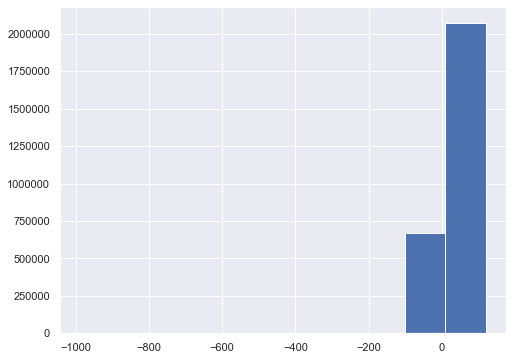

In [23]:
sec_pupil_df.age.hist()

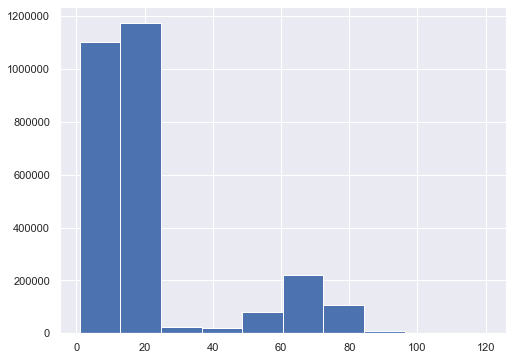

In [24]:
sec_pupil_df[sec_pupil_df.age > 0].age.hist()

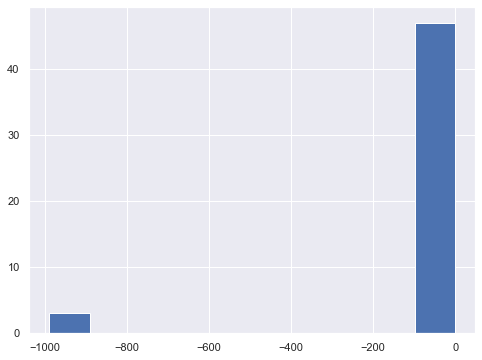

In [25]:
sec_pupil_df[sec_pupil_df.age <= 0].age.hist()

In [26]:
len(sec_pupil_df[sec_pupil_df.age <= 0].age)

50

In [30]:
def age_cat(x):
    cat = str()
    if x < 7:
        cat = 'undershool'
    elif x < 11:
        cat = 'primary_school'    
    elif x < 18:
        cat = 'mid_high_school'
    elif x < 23:
        cat = 'student'
    elif x < 30:
        cat = 'young_professionals'
    elif x < 55:
        cat = 'working'
    else:
        cat = 'retired'
    return cat

In [31]:
sec_pupil_df['age_cat'] = sec_pupil_df['age'].apply(lambda x: age_cat(x))

In [32]:
sec_pupil_df.head()

,pupil_id,age,gender,age_cat
0,1,12.0,Женский,mid_high_school
1,2,12.0,Женский,mid_high_school
2,3,12.0,Женский,mid_high_school
3,4,11.0,Женский,mid_high_school
4,5,12.0,Женский,mid_high_school


In [33]:
sec_pupil_df['age_cat'].value_counts()

mid_high_school        999021
primary_school         556842
student                433278
retired                408987
undershool             257570
working                 44873
young_professionals     42060
Name: age_cat, dtype: int64

In [34]:
sec_pupil_df['gender'].value_counts()

Женский    1433212
Мужской    1307871
Name: gender, dtype: int64

In [35]:
map_ = {
    'Женский':'F',
    'Мужской':'M',
}

In [36]:
sec_pupil_df['gender'] = sec_pupil_df['gender'].map(map_)

In [38]:
sec_pupil_df.drop('age', axis=1, inplace=True)

### Sections_relations

In [11]:
sec_rel_df.head()

,id_зачисления,Статус,id_ученика,Дата_создания_записи,id_заявления,id_услуги,дата_зачисления,причина_перевода
0,1325954,3.0,25969.0,08.06.2015 14:47:19,950832.0,39178,08.06.2015 0:00:00,NaN
1,2879918,3.0,158129.0,29.10.2015 18:35:21,989658.0,39178,01.09.2010 0:00:00,NaN
2,2901258,3.0,304476.0,02.11.2015 14:05:56,950764.0,39178,09.06.2014 0:00:00,NaN
3,2912724,3.0,1139915.0,03.11.2015 14:29:27,950786.0,39178,09.06.2014 0:00:00,NaN
4,2912819,3.0,298767.0,03.11.2015 14:34:15,950799.0,39178,09.06.2014 0:00:00,NaN


In [14]:
sec_rel_df.shape

(724813, 8)

In [13]:
sec_rel_df['причина_перевода'].value_counts()

2.0    2
Name: причина_перевода, dtype: int64

In [15]:
sec_rel_df.drop(columns=['id_заявления', 'причина_перевода'], inplace=True)

In [16]:
sec_rel_df.drop(columns=['Дата_создания_записи'], inplace=True)

In [18]:
sec_rel_df.head()

,id_зачисления,Статус,id_ученика,id_услуги,дата_зачисления
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00


In [19]:
sec_rel_df.columns = ['onboarding_id', 'status', 'pupil_id', 'service_id', 'onboarding_date']

In [39]:
sec_rel_df.head()

,onboarding_id,status,pupil_id,service_id,onboarding_date
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00


In [490]:
def extract_year(x):
    if isinstance(x,str):
        return int(x.split('.')[2].split(' ')[0])
    elif isinstance(x, float):
        return x
    else:
        return int(x.strftime('%Y-%m-%d-%H.%M.%S').split('-')[0])

In [41]:
# def extract_month(x):
#     if isinstance(x,str):
#         return x.split('-')[1]
#     else:
#         return x.strftime('%Y-%m-%d-%H.%M.%S').split('-')[1]

In [55]:
sec_rel_df['onboarding_year'] = sec_rel_df['onboarding_date'].apply(lambda x: extract_year(x))

In [56]:
sec_rel_df['onboarding_year'].value_counts()

2016    152541
2015    129542
2017    115653
2018    101440
2019     98863
2014     39023
2020     38587
2013      4411
2012      1093
2011       786
2010       551
2009       492
2008       121
1919        38
2007        38
2005        28
2006        20
2004         9
2026         9
2001         5
2021         5
0201         3
2003         3
0215         3
2002         2
1956         2
1920         2
2022         1
1970         1
1948         1
2000         1
2046         1
2023         1
0214         1
1947         1
1979         1
1012         1
0216         1
2915         1
1918         1
1953         1
2029         1
2104         1
0205         1
Name: onboarding_year, dtype: int64

In [57]:
sec_rel_df.drop(columns=['onboarding_year', 'onboarding_year'], inplace=True)

In [58]:
sec_rel_df.head()

,onboarding_id,status,pupil_id,service_id,onboarding_date
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00


In [59]:
sec_rel_df.status.value_counts()

2.0    288103
3.0    198300
1.0    161374
Name: status, dtype: int64

In [61]:
sec_rel_df.status.nunique()

3

In [63]:
sec_rel_df.pupil_id.isnull().sum()

77036

In [67]:
sec_rel_df.pupil_id.dropna(inplace=True)

In [68]:
sec_rel_df.pupil_id.isnull().sum()

0

In [69]:
sec_rel_df.pupil_id = sec_rel_df.pupil_id.astype(int)

### Sections services

In [12]:
sec_serv_df.head()

,id_услуги,Тип_финансирования,Тип_расписания,Наименование_услуги,Дата_создания,длительность_обучения,единица_длительности
0,39178,бесплатно,Индивидуальное,Архитектура,17.07.2013 12:50:32,"7,0000",лет
1,39181,бесплатно,Индивидуальное,Архитектура,17.07.2013 13:04:41,"7,0000",лет
2,212072,бесплатно,Индивидуальное,Архитектура,27.10.2015 15:59:48,"7,0000",лет
3,212517,бесплатно,Индивидуальное,Архитектура,29.10.2015 18:45:49,"7,0000",лет
4,39913,бесплатно,Индивидуальное,Декоративно-прикладное искусство,17.07.2013 20:35:28,"7,0000",лет


In [71]:
sec_serv_df['единица_длительности'].value_counts()

лет        37695
месяцев     3145
дней          58
недель        55
Name: единица_длительности, dtype: int64

In [72]:
sec_serv_df['длительность_обучения'].value_counts()

1,0000     12126
5,0000      8826
8,0000      6251
7,0000      5690
3,0000      2851
9,0000      2572
2,0000      1832
10,0000      284
4,0000       240
11,0000      100
12,0000       73
6,0000        71
43,0000       10
99,0000        5
35,0000        3
20,0000        3
30,0000        3
18,0000        3
60,0000        1
14,0000        1
Name: длительность_обучения, dtype: int64

In [78]:
sec_serv_df[sec_serv_df['единица_длительности'] == 'месяцев']['длительность_обучения'].value_counts()

9,0000     2493
10,0000     223
11,0000      82
12,0000      71
3,0000       68
8,0000       61
1,0000       50
2,0000       33
4,0000       20
6,0000       17
7,0000       12
5,0000       12
18,0000       2
99,0000       1
Name: длительность_обучения, dtype: int64

In [76]:
sec_serv_df[sec_serv_df['единица_длительности'] == 'недель']['длительность_обучения'].value_counts()

2,0000     24
43,0000    10
35,0000     3
3,0000      2
9,0000      2
30,0000     2
12,0000     1
10,0000     1
8,0000      1
4,0000      1
Name: длительность_обучения, dtype: int64

In [77]:
sec_serv_df[sec_serv_df['единица_длительности'] == 'дней']['длительность_обучения'].value_counts()

10,0000    36
5,0000     10
1,0000      4
20,0000     3
12,0000     1
8,0000      1
9,0000      1
30,0000     1
6,0000      1
Name: длительность_обучения, dtype: int64

In [79]:
def course_dur(x):
    if x == 'лет':
        return 'yearly'
    elif x == 'месяцев' or x == 'недель':
        return 'monthly'
    else:
        return 'daily'

In [80]:
sec_serv_df['course_duration'] = sec_serv_df['единица_длительности'].apply(lambda x: course_dur(x))

In [83]:
sec_serv_df[(sec_serv_df['единица_длительности'] == 'месяцев') & (sec_serv_df['длительность_обучения'].isin(['1','2']))]['course_duration'] = 'monthly'

In [84]:
sec_serv_df[(sec_serv_df['единица_длительности'] == 'недель') & (sec_serv_df['длительность_обучения'].isin(['1','2', '3']))]['course_duration'] = 'daily'

In [85]:
sec_serv_df[(sec_serv_df['единица_длительности'] == 'дней') & (sec_serv_df['длительность_обучения'].isin(['36']))]['course_duration'] = 'monthly'

In [86]:
sec_serv_df.drop(columns=['единица_длительности', 'длительность_обучения'], inplace=True)

In [87]:
sec_serv_df.head()

,id_услуги,Тип_финансирования,Тип_расписания,Наименование_услуги,Дата_создания,course_duration
0,39178,бесплатно,Индивидуальное,Архитектура,17.07.2013 12:50:32,yearly
1,39181,бесплатно,Индивидуальное,Архитектура,17.07.2013 13:04:41,yearly
2,212072,бесплатно,Индивидуальное,Архитектура,27.10.2015 15:59:48,yearly
3,212517,бесплатно,Индивидуальное,Архитектура,29.10.2015 18:45:49,yearly
4,39913,бесплатно,Индивидуальное,Декоративно-прикладное искусство,17.07.2013 20:35:28,yearly


In [92]:
sec_serv_df['year_creation'] = sec_serv_df['Дата_создания'].apply(lambda x: extract_year(x))

In [93]:
def is_newly_created(x):
    if x > 2020:
        return 'Y'
    else:
        return 'N'

In [94]:
sec_serv_df['is_newly_created'] = sec_serv_df['year_creation'].apply(lambda x: is_newly_created(x))

In [95]:
sec_serv_df.drop(columns=['Дата_создания', 'year_creation'], inplace=True)

In [96]:
sec_serv_df.head()

,id_услуги,Тип_финансирования,Тип_расписания,Наименование_услуги,course_duration,is_newly_created
0,39178,бесплатно,Индивидуальное,Архитектура,yearly,N
1,39181,бесплатно,Индивидуальное,Архитектура,yearly,N
2,212072,бесплатно,Индивидуальное,Архитектура,yearly,N
3,212517,бесплатно,Индивидуальное,Архитектура,yearly,N
4,39913,бесплатно,Индивидуальное,Декоративно-прикладное искусство,yearly,N


In [97]:
sec_serv_df['Тип_финансирования'].value_counts()

бесплатно    28791
платно       12181
Name: Тип_финансирования, dtype: int64

In [98]:
def is_free(x):
    if x == 'бесплатно':
        return 'Y'
    else:
        return 'N'

In [99]:
sec_serv_df['is_free'] = sec_serv_df['Тип_финансирования'].apply(lambda x: is_free(x))

In [101]:
sec_serv_df.drop(columns=['Тип_финансирования'], inplace=True)

In [102]:
sec_serv_df['Тип_расписания'].value_counts()

Общее             26630
Индивидуальное    14341
Name: Тип_расписания, dtype: int64

In [103]:
def is_individual(x):
    if x == 'Индивидуальное':
        return 'Y'
    else:
        return 'N'

In [107]:
sec_serv_df['is_individual'] = sec_serv_df['Тип_расписания'].apply(lambda x: is_individual(x))

In [108]:
sec_serv_df.drop(columns=['Тип_расписания'], inplace=True)

In [109]:
sec_serv_df.head()

,id_услуги,Наименование_услуги,course_duration,is_newly_created,is_free,is_individual
0,39178,Архитектура,yearly,N,Y,Y
1,39181,Архитектура,yearly,N,Y,Y
2,212072,Архитектура,yearly,N,Y,Y
3,212517,Архитектура,yearly,N,Y,Y
4,39913,Декоративно-прикладное искусство,yearly,N,Y,Y


In [111]:
#### Services names

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [345]:
services = sec_serv_df[['Наименование_услуги']]

In [346]:
services.drop_duplicates(inplace=True)

In [347]:
services.shape

(17057, 1)

In [348]:
services['Services'] = services['Наименование_услуги']

In [349]:
services.dropna(inplace=True)

In [350]:
def remove_trash(x):
    return x.split('(')[0]

In [351]:
services['Services'] = services['Services'].apply(lambda x: remove_trash(x))

In [352]:
services['Services'] = services['Services'].apply(lambda x: x.lower())

In [353]:
trash_list = [',', 'уровень i', 'уровень ii',
             'уровень iii', '/', '.', '"',
             '8-летняя программа обучения',
             '5-летняя программа обучения',
             '7-летняя программа обучения',
             '1623', '2017', '2018', '2019',
              'i', '1', 'исток', 'доучивание',
              'уровень', 'студия', 'для',
              'секция', 'подготовка', 'занятия',
              'клуб', 'раннего', 'объединение',
              'неделю', 'срок', 'комплексная', 'обучения',
              'общеразвивающая', 'предпрофессиональная', 'программа',
              'формирование', 'детей', 'детский', 'детская', 
              'года', 'группа', 'образовательная', 'основа',
              'формирование'
              
             ]

In [354]:
def remove_specials(x):
    for trash in trash_list:
        if trash in x:
            x = x.replace(trash, '')
        else:
            pass
    return x.strip()

In [355]:
services['Services'] = services['Services'].apply(lambda x: remove_specials(x))

In [344]:
# services.tail(50)

In [229]:
from sklearn.feature_extraction.text import CountVectorizer

In [295]:
cv = CountVectorizer(max_df=0.5)

In [296]:
dtm = cv.fit_transform(services['Services'])

In [297]:
from sklearn.decomposition import LatentDirichletAllocation

In [298]:
LDA = LatentDirichletAllocation(n_components=10,
                               batch_size=256,
                               learning_decay=0.2) #playaround

In [299]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.2,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [300]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['хореографии', 'любителей', 'театр', 'вокальный', 'вокально', 'хореографический', 'танца', 'песни', 'кружок', 'ансамбль']


THE TOP 15 WORDS FOR TOPIC #1
['гимнастики', 'фольклор', 'гимнастика', 'развитие', 'театр', 'домра', 'развития', 'саксофон', 'музыкальный', 'кружок']


THE TOP 15 WORDS FOR TOPIC #2
['театральная', 'хор', 'театр', 'шахматы', 'год', 'dance', 'танцев', 'труба', 'язык', 'английский']


THE TOP 15 WORDS FOR TOPIC #3
['гитаре', 'кружок', 'фитнес', 'виолончель', 'танцевальная', 'вокальная', 'баян', 'игры', 'арт', 'на']


THE TOP 15 WORDS FOR TOPIC #4
['гр', 'танцевальная', 'любительское', 'лаборатория', '2020', 'эстрадно', 'аккордеон', 'творческая', 'фортепиано', 'мастерская']


THE TOP 15 WORDS FOR TOPIC #5
['эстетического', 'тхэквондо', 'музыкальная', 'тромбон', 'кружок', 'школе', 'гр', 'радуга', 'центр', 'развития']


THE TOP 15 WORDS FOR TOPIC #6
['искусство', 'музыкальное', 'струнные', 'народные', 'духовые', 'балалайка', 'флейта', 'уд

In [290]:
# topic_words_dict = dict()
# for index,topic in enumerate(LDA.components_):
#     words = [cv.get_feature_names()[i] for i in topic.argsort()[-50:]]
#     topic_words_dict[index] = words

In [291]:
# def add_cluster(x):
#     group = str()
#     for key, values in topic_words_dict.items():
#         for val in values:
#             if val in x:
#                 group += (str(key) + ' ')
#                 break
#     return group

In [292]:
# services['group'] = services['Services'].apply(lambda x: add_cluster(x))

In [293]:
# services.head(50)

,Наименование_услуги,Services,group
0,Архитектура,архитектура,
4,Декоративно-прикладное искусство,декоративно-прикладное искусство,2 4 5 6 7 8
14,Компьютерный дизайн (комплексная 3-летняя про...,компьютерный дизайн,0
16,Изобразительное искусство (комплексная 4-летня...,изобразительное искусство,2 4 5 6 7 8
17,Изобразительное искусство,изобразительное искусство,2 4 5 6 7 8
107,Компьютерная графика и анимация,компьютерная графика и анимация,0 1 2 3 5 6 8 9
111,Художественная фотография,художественная фотография,0 1 2 3 5 6 7 8 9
116,Академическое сольное пение (комплексная 5-ле...,академическое сольное пение,0 1 2 5 6 8
119,Академическое сольное пение (комплексная 7-ле...,академическое сольное пение,0 1 2 5 6 8
122,Академическое сольное пение,академическое сольное пение,0 1 2 5 6 8


In [294]:
# services['group'].value_counts()

                      1403
7                      459
0 1 2 3 4 5 6 8 9      416
8                      386
4                      342
                      ... 
0 1 3 4 7 8 9            1
2 3 4 5 9                1
0 4 5 8                  1
2 3 5 7                  1
2 6 8 9                  1
Name: group, Length: 615, dtype: int64

#### MIxture of LDA and tesaurus

In [466]:
tesaurus = {
    'music_instruments':['струнные', 'народные', 'духовые', 'балалайка', 'флейта', 'ударные', 'гитара', 'инструменты',
                        'гитар', 'виолонч', 'баян', 'аккордеон', 'фортепиано', 'тромбон', 'арфа', 'альт',
                         'альт', 'валторна', 'гобой', 'гусли', 'домра', 'кларнет', 'клавиш', 'контраб', 'сакс', 'труба', 
                         'фагот','кларнет', 'скрипка', 'сольфедж', 'синтезат', 'орган', 'клавесин', 'пианин'],
    'sport_fitness':['гимнаст', 'фитне', 'йога', 'карат', 'айкид', 'ходьба', 'акробат', 'физич', 'футбол'],
    'dances_theatre':['хореограф', 'танц', 'бальн', 'современ', 'балет', 'танец', 'муз', 'степ', 'пласти'],
    'theatre_cinema':['театр', 'режис', 'кино', 'актер', 'импровиз', 'продюс', 'цирк', 'сцен', 'аранж'],
    'music_singing_vocal':['вокал', 'ансамбл', 'песн', 'музык','эстрадно', 'хор', 'пение', 'джаз'],
    'art_drawing':['арт', 'архит', 'эстет', 'изо', 'декор', 'художест', 'искусст', 'рис'],
    'languages':['язык', 'англ', 'engli'],
    'add_edu':['разви', 'комп', 'ум', 'геол', 'арифм', 'школ', 'подготов', 'чтен', 'знан', 'матем',
              'егэ', 'робототехн'],
    'history_socio':['истор', 'ветер', 'патрио', 'росси','волонт', 'лидер'],
    'hobbies_craftery':['авто', 'светоф'],
    'games':['шахм', 'игр']
}

In [473]:
def add_cluster(x):
    group = np.nan
    stop = 0
    for key, values in tesaurus.items():
        for val in values:
            if val in x:
                group = key
                stop = 1
                break
        if stop == 1:
            break
    if stop == 0:
        return 'hobbies_craftery'
    return group

In [474]:
services['group'] = services['Services'].apply(lambda x: add_cluster(x))

In [475]:
services.head(20)

,Наименование_услуги,Services,group
0,Архитектура,архитектура,art_drawing
4,Декоративно-прикладное искусство,декоративно-прикладное искусство,art_drawing
14,Компьютерный дизайн (комплексная 3-летняя про...,компьютерный дизайн,add_edu
16,Изобразительное искусство (комплексная 4-летня...,изобразительное искусство,art_drawing
17,Изобразительное искусство,изобразительное искусство,art_drawing
107,Компьютерная графика и анимация,компьютерная графика и анимация,add_edu
111,Художественная фотография,художественная фотография,art_drawing
116,Академическое сольное пение (комплексная 5-ле...,академическое сольное пение,music_singing_vocal
119,Академическое сольное пение (комплексная 7-ле...,академическое сольное пение,music_singing_vocal
122,Академическое сольное пение,академическое сольное пение,music_singing_vocal


In [476]:
services[services['group'].isna() == True].shape

(0, 3)

In [477]:
services[services['group'].isna() == True].head(50)

,Наименование_услуги,Services,group


In [478]:
service_group_dict = dict()
for row in services.itertuples():
    service_group_dict[row[1]] = row[3]

In [480]:
sec_serv_df['Service_group'] = sec_serv_df['Наименование_услуги'].map(service_group_dict)

In [481]:
sec_serv_df.head()

,id_услуги,Наименование_услуги,course_duration,is_newly_created,is_free,is_individual,Service_group
0,39178,Архитектура,yearly,N,Y,Y,art_drawing
1,39181,Архитектура,yearly,N,Y,Y,art_drawing
2,212072,Архитектура,yearly,N,Y,Y,art_drawing
3,212517,Архитектура,yearly,N,Y,Y,art_drawing
4,39913,Декоративно-прикладное искусство,yearly,N,Y,Y,art_drawing


In [484]:
sec_serv_df.shape

(40972, 7)

In [482]:
sec_rel_df.head()

,onboarding_id,status,pupil_id,service_id,onboarding_date
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00


In [485]:
sec_rel_df.shape

(724813, 5)

In [483]:
sec_pupil_df.head()

,pupil_id,gender,age_cat
0,1,F,mid_high_school
1,2,F,mid_high_school
2,3,F,mid_high_school
3,4,F,mid_high_school
4,5,F,mid_high_school


In [486]:
df_serv_merge = sec_rel_df.merge(sec_serv_df, how='left', left_on='service_id', right_on='id_услуги')

In [488]:
df_serv_merge = df_serv_merge.merge(sec_pupil_df, how='left', left_on='pupil_id', right_on='pupil_id')

In [489]:
df_serv_merge.head()

,onboarding_id,status,pupil_id,service_id,onboarding_date,id_услуги,Наименование_услуги,course_duration,is_newly_created,is_free,is_individual,Service_group,gender,age_cat
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,student
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,mid_high_school


In [491]:
df_serv_merge['Onboard_year'] = df_serv_merge['onboarding_date'].apply(lambda x: extract_year(x))

In [492]:
df_serv_merge.head()

,onboarding_id,status,pupil_id,service_id,onboarding_date,id_услуги,Наименование_услуги,course_duration,is_newly_created,is_free,is_individual,Service_group,gender,age_cat,Onboard_year
0,1325954,3.0,25969.0,39178,08.06.2015 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2015.0
1,2879918,3.0,158129.0,39178,01.09.2010 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,student,2010.0
2,2901258,3.0,304476.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2014.0
3,2912724,3.0,1139915.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2014.0
4,2912819,3.0,298767.0,39178,09.06.2014 0:00:00,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,mid_high_school,2014.0


In [493]:
df_serv_merge.drop(columns=['onboarding_date', 'id_услуги'], inplace=True)

In [494]:
df_serv_merge.head()

,onboarding_id,status,pupil_id,service_id,Наименование_услуги,course_duration,is_newly_created,is_free,is_individual,Service_group,gender,age_cat,Onboard_year
0,1325954,3.0,25969.0,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2015.0
1,2879918,3.0,158129.0,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,student,2010.0
2,2901258,3.0,304476.0,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2014.0
3,2912724,3.0,1139915.0,39178,Архитектура,yearly,N,Y,Y,art_drawing,M,mid_high_school,2014.0
4,2912819,3.0,298767.0,39178,Архитектура,yearly,N,Y,Y,art_drawing,F,mid_high_school,2014.0


In [495]:
df_serv_merge.drop(columns=['onboarding_id'], inplace=True)

In [496]:
df_serv_merge.to_csv('data_algo/courses_merged.csv')

### Activities

In [497]:
activities = 'activities.csv'

In [498]:
activities_df = pd.read_csv(os.path.join(PATH, activities), index_col=0)

In [499]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,Наименование праздника или события,Округ,Возрастная категория,Целевая аудитория
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,NaN,NaN,от 20 до 40,NaN
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,9 мая. День Победы,Южный административный округ,от 40 до 85,"работающая молодежь, взрослые, пенсионеры"
2,Врасплох,выставка,антитеррор,NaN,Южный административный округ,от 16 до 100,"школьники, работающая молодежь, студенческая м..."
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1 января. Новый год,NaN,от 5 до 14,"дети дошкольного возраста, школьники"
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1 января. Новый год,Южный административный округ,от 15 до 80,"дети дошкольного возраста, школьники, работающ..."


In [500]:
activities_df.shape

(41074, 7)

In [501]:
activities_df['Целевая аудитория'].value_counts()

дети дошкольного возраста, школьники, работающая молодежь, студенческая молодежь, взрослые, пенсионеры    6542
школьники, работающая молодежь, студенческая молодежь, взрослые, пенсионеры                               6071
школьники                                                                                                 4511
дети дошкольного возраста, школьники                                                                      4219
работающая молодежь, студенческая молодежь, взрослые, пенсионеры                                          1864
                                                                                                          ... 
школьники, работающая молодежь, студенческая молодежь, другое, пенсионеры                                    1
школьники, студенческая молодежь, взрослые, другое                                                           1
дети дошкольного возраста, работающая молодежь, студенческая молодежь                                        1
д

In [503]:
activities_df['Целевая аудитория'].isnull().sum()

5306

In [950]:
activities_df['Возрастная категория'].value_counts()

от 6 до 99     2815
от 12 до 99    1971
от 0 до 99     1868
от 6 до 12     1731
от 6 до 14     1535
               ... 
от 4 до 95        1
от 0 до 250       1
от 18 до 20       1
от 13 до 40       1
от 2 до 80        1
Name: Возрастная категория, Length: 669, dtype: int64

In [958]:
def pretty_age_cat(x):
    ages = x.split(' ')
    from_ = ages[1]
    to =ages[-1]
    return (int(from_), int(to))

In [959]:
activities_df['age_cat'] = activities_df['Возрастная категория'].apply(lambda x: pretty_age_cat(x))

In [960]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,Наименование праздника или события,Округ,Возрастная категория,Целевая аудитория,age_cat
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,NaN,NaN,от 20 до 40,NaN,"(20, 40)"
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,9 мая. День Победы,Южный административный округ,от 40 до 85,"работающая молодежь, взрослые, пенсионеры","(40, 85)"
2,Врасплох,выставка,антитеррор,NaN,Южный административный округ,от 16 до 100,"школьники, работающая молодежь, студенческая м...","(16, 100)"
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1 января. Новый год,NaN,от 5 до 14,"дети дошкольного возраста, школьники","(5, 14)"
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1 января. Новый год,Южный административный округ,от 15 до 80,"дети дошкольного возраста, школьники, работающ...","(15, 80)"


In [975]:
def fill_target(row):
    try:
        if math.isnan(row['Целевая аудитория']) == True:
            from_, to = row['age_cat']
            if to < 7:
                return 'дети дошкольного возраста'
            elif to < 18 and from_ >= 7:
                return 'школьники'
            elif to < 18:
                return 'дети дошкольного возраста, школьники'
            elif to < 55 and from_ >= 18:
                return 'работающая молодежь, студенческая молодежь, взрослые'
            else:
                return 'дети дошкольного возраста, школьники, работающая молодежь, студенческая молодежь, взрослые, пенсионеры'
        else:
            return row['Целевая аудитория']
    except:
        return row['Целевая аудитория']

In [976]:
activities_df['Целевая аудитория'] = activities_df.apply(lambda row: fill_target(row), axis=1)

In [977]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,Наименование праздника или события,Округ,Возрастная категория,Целевая аудитория,age_cat
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,NaN,NaN,от 20 до 40,"дети дошкольного возраста, школьники, работающ...","(20, 40)"
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,9 мая. День Победы,Южный административный округ,от 40 до 85,"работающая молодежь, взрослые, пенсионеры","(40, 85)"
2,Врасплох,выставка,антитеррор,NaN,Южный административный округ,от 16 до 100,"школьники, работающая молодежь, студенческая м...","(16, 100)"
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1 января. Новый год,NaN,от 5 до 14,"дети дошкольного возраста, школьники","(5, 14)"
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1 января. Новый год,Южный административный округ,от 15 до 80,"дети дошкольного возраста, школьники, работающ...","(15, 80)"


In [978]:
activities_df.drop(columns=['Округ', 'Возрастная категория', 'age_cat'], inplace=True)

In [979]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,Наименование праздника или события,Целевая аудитория
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,NaN,"дети дошкольного возраста, школьники, работающ..."
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,9 мая. День Победы,"работающая молодежь, взрослые, пенсионеры"
2,Врасплох,выставка,антитеррор,NaN,"школьники, работающая молодежь, студенческая м..."
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1 января. Новый год,"дети дошкольного возраста, школьники"
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1 января. Новый год,"дети дошкольного возраста, школьники, работающ..."


In [980]:
def is_for_underschool(x):
    if 'дошколь' in x:
        return 1
    else:
        return 0

In [981]:
def is_for_school(x):
    if 'школьни' in x:
        return 1
    else:
        return 0

In [982]:
def is_for_student(x):
    if 'студен' in x or 'молод':
        return 1
    else:
        return 0

In [983]:
def is_for_retired(x):
    if 'пенси' in x:
        return 1
    else:
        return 0

In [984]:
def is_for_adult(x):
    if 'взросл' in x:
        return 1
    else:
        return 0

In [986]:
activities_df['is_for_underschool'] = activities_df['Целевая аудитория'].apply(lambda x: is_for_underschool(x))
activities_df['is_for_school'] = activities_df['Целевая аудитория'].apply(lambda x: is_for_school(x))
activities_df['is_for_student'] = activities_df['Целевая аудитория'].apply(lambda x: is_for_student(x))
activities_df['is_for_adult'] = activities_df['Целевая аудитория'].apply(lambda x: is_for_adult(x))
activities_df['is_for_retired'] = activities_df['Целевая аудитория'].apply(lambda x: is_for_retired(x))

In [987]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,Наименование праздника или события,Целевая аудитория,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,NaN,"дети дошкольного возраста, школьники, работающ...",1,1,1,1,0
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,9 мая. День Победы,"работающая молодежь, взрослые, пенсионеры",0,0,0,1,1
2,Врасплох,выставка,антитеррор,NaN,"школьники, работающая молодежь, студенческая м...",0,1,1,1,1
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1 января. Новый год,"дети дошкольного возраста, школьники",1,1,0,0,0
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1 января. Новый год,"дети дошкольного возраста, школьники, работающ...",1,1,1,1,1


In [988]:
activities_df.drop(columns=['Целевая аудитория'], inplace=True)

In [989]:
activities_df['Тип мероприятия'].value_counts()

интерактивное занятие, мастер-класс, урок                                                                             8395
комплексное мероприятие, тематическая программа                                                                       6757
лекция                                                                                                                3677
концерт, музыкальное представление                                                                                    3435
выставка                                                                                                              2552
презентация, демонстрация, показетльные выступления                                                                   1914
встреча, творческий вечер                                                                                             1728
литературные чтения, декламация стихов, литературно-музыкальная программа, художественная читка, поэтический вечер    1663
представление, с

In [990]:
activities_df['Направленность мероприятия'].value_counts()

культурно-досуговое                                                                                                                                                                                                                                                25783
просветительское                                                                                                                                                                                                                                                    8274
патриотическое                                                                                                                                                                                                                                                      2696
спортивное, пропаганда здорового образа жизни                                                                                                                                                                

In [992]:
activities_df['Наименование праздника или события'].value_counts()

9 мая. День Победы                                    1240
1 января. Новый год                                    772
8 марта. Международный женский день                    525
8-9 сентября. День города                              473
23 февраля. День защитника Отечества                   434
                                                      ... 
5 декабря. 200 лет со дня рождения А.А.Фета              1
29 сентября. 200 лет со дня рождения И.Е.Забелина        1
13 ноября. 170 лет со дня рождения Р.Л.Стивенсона        1
3 ноября. 125 лет со дня рождения Э.Г.Багрицкого         1
3 мая. Всемирный день свободы печати                     1
Name: Наименование праздника или события, Length: 123, dtype: int64

In [998]:
def define_event_date(x):
    try:
        if math.isnan(x) == True:
            return x
        else:
            return x.split('.')[0]
    except TypeError:
        return x.split('.')[0]

In [999]:
activities_df['event_date'] = activities_df['Наименование праздника или события'].apply(lambda x: define_event_date(x))

In [1001]:
activities_df.drop(columns=['Наименование праздника или события'], inplace=True)

In [1002]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,1,1,1,1,0,NaN
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,0,0,0,1,1,9 мая
2,Врасплох,выставка,антитеррор,0,1,1,1,1,NaN
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1,1,0,0,0,1 января
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1,1,1,1,1,1 января


In [1003]:
# по праздникам рекомендуем перед датой
# мероприятия остальные LDA - tesaurus

In [1004]:
act_no_event = activities_df[activities_df['event_date'].isnull() == True]

In [1005]:
act_no_event.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,1,1,1,1,0,NaN
2,Врасплох,выставка,антитеррор,0,1,1,1,1,NaN
5,Зимняя сказка,"презентация, демонстрация, показетльные выступ...",культурно-досуговое,1,1,0,0,0,NaN
9,Зимние мотивы,выставка,культурно-досуговое,1,1,1,1,1,NaN
10,Вдохновение Ясенево,квест,культурно-досуговое,1,1,1,1,1,NaN


In [1006]:
act_no_event.shape

(30965, 9)

In [1007]:
act_names = act_no_event[['Название мероприятия']]

In [1008]:
act_names['names'] = act_names['Название мероприятия']

In [1009]:
cv = CountVectorizer(max_df=0.5)

In [1010]:
dtm = cv.fit_transform(act_names['names'])

In [1011]:
LDA = LatentDirichletAllocation(n_components=10,
                               batch_size=256,
                               learning_decay=0.2) #playaround

In [1012]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.2,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [1013]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['здоровые', 'книжный', 'тела', 'уличный', 'артист', 'мой', 'игротека', 'онлайн', 'на', 'для']


THE TOP 15 WORDS FOR TOPIC #1
['путь', 'волшебный', 'сказок', 'среда', 'ты', 'мир', 'масленица', 'гостях', 'мы', 'вечер']


THE TOP 15 WORDS FOR TOPIC #2
['работ', 'показ', 'выставка', 'от', 'ансамбля', 'урок', 'онлайн', 'открытый', 'клуб', 'по']


THE TOP 15 WORDS FOR TOPIC #3
['город', 'осень', 'лайн', 'мира', 'моя', 'по', 'время', 'на', 'он', 'выставка']


THE TOP 15 WORDS FOR TOPIC #4
['для', 'концерт', 'студии', 'рубрика', 'от', 'из', 'онлайн', 'по', 'класс', 'мастер']


THE TOP 15 WORDS FOR TOPIC #5
['сказка', 'день', 'программа', 'спектакль', 'танец', 'практика', 'танцевальная', 'для', 'студии', 'танца']


THE TOP 15 WORDS FOR TOPIC #6
['открытие', 'всё', 'история', 'русской', 'кто', 'без', 'онлайн', 'из', 'на', 'концерт']


THE TOP 15 WORDS FOR TOPIC #7
['клуб', 'книга', 'дверей', 'открытых', 'книг', 'книги', 'по', 'для', 'день', 'онлайн']


THE TOP 15 

In [1132]:
activities_tesaurus = {
    'time_related':['зим', 'маслениц', 'новогодн', 'рождест', 'новы', 'мороз',
                   'новогод', 'снег', 'ёлочка', 'нового', 'двенадцать', '12',
                   'ёлк'],
    'place_related':['ясенево'],
    'history':['истор', 'русск', 'отчизн'],
    'dance':['танц', 'танец', 'dance'],
    'cinema_theatre':['кин', 'фильм', 'театр'],
    'art_drawing':['рисо', 'диза', 'художн'],
    'foreign_languages':['lang'],
    'music_instruments':['гитар'],
    'biography':['people', 'жизн']
}

In [1133]:
def add_cluster(x):
    group = np.nan
    stop = 0
    for key, values in activities_tesaurus.items():
        for val in values:
            if val in x:
                group = key
                stop = 1
                break
        if stop == 1:
            break
#     if stop == 0:
#         return 'hobbies_craftery'
    return group

In [1134]:
act_names['names'] = act_names['names'].apply(lambda x: x.lower())

In [1135]:
act_names['group'] = act_names['names'].apply(lambda x: add_cluster(x))

In [1136]:
# act_names.head(20)

In [1137]:
act_names[act_names['group'].isna() == True].shape

(25311, 3)

In [1139]:
act_names[act_names['group'].isna() == True].head(50)

,Название мероприятия,names,group
0,Фестивлаь современных молодежных уличных культ...,фестивлаь современных молодежных уличных культ...,NaN
2,Врасплох,врасплох,NaN
13,"Завод, усадьба, ковш и подводная лодка","завод, усадьба, ковш и подводная лодка",NaN
14,По следам старинных усадеб,по следам старинных усадеб,NaN
19,"Завод, усадьба, ковш и подводная лодка","завод, усадьба, ковш и подводная лодка",NaN
20,По следам старинных усадеб,по следам старинных усадеб,NaN
26,"Завод, усадьба, ковш и подводная лодка","завод, усадьба, ковш и подводная лодка",NaN
27,По следам старинных усадеб,по следам старинных усадеб,NaN
28,Юные надежды,юные надежды,NaN
45,Флексагон,флексагон,NaN


In [1140]:
activities_group_dict = dict()
for row in act_names.itertuples():
    activities_group_dict[row[1]] = row[3]

In [1168]:
activities_df['Semantic_tag'] = activities_df['Название мероприятия'].map(activities_group_dict)

In [1169]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date,Semantic_tag
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,1,1,1,1,0,NaN,NaN
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,0,0,0,1,1,9 мая,NaN
2,Врасплох,выставка,антитеррор,0,1,1,1,1,NaN,NaN
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1,1,0,0,0,1 января,time_related
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1,1,1,1,1,1 января,NaN


In [1170]:
activities_df['Тип мероприятия'].value_counts()

интерактивное занятие, мастер-класс, урок                                                                             8395
комплексное мероприятие, тематическая программа                                                                       6757
лекция                                                                                                                3677
концерт, музыкальное представление                                                                                    3435
выставка                                                                                                              2552
презентация, демонстрация, показетльные выступления                                                                   1914
встреча, творческий вечер                                                                                             1728
литературные чтения, декламация стихов, литературно-музыкальная программа, художественная читка, поэтический вечер    1663
представление, с

In [1171]:
based_on_type_tesaurus = {
    'time_related':[],
    'place_related':['уличная акция, праздник двора, игры на свежем воздухе'],
    'history':['уроки мужества, встреча с ветеранами'],
    'dance':['танцевальный вечер, бал',],
    'cinema_theatre':['просмотр фильмов, мультфильмов, кинолекторий, кинопоказ',
                     'представление, спектакль, инсценировка, перфоманс, театрализованное представление',
                     ],
    'art_drawing':['выставка', 'открытие выставки (вернисаж)', 'инсталляция', 'закрытие выставки (финисаж)', 'выставка'],
    'foreign_languages':[],
    'music':['саунд-инсталляция', 'прослушивание, смотр, концерт, музыкальное представление', ],
    'biography':[],
    'education':['консультация, методическое занятие, семинар, тренинг', 'конкурс, соревнование',
                 'викторина', 'экскурсия', 'консультация, методическое занятие, семинар, тренинг, лекция',
                 'интерактивное занятие, мастер-класс, урок'  
                ],
    'poetry':['литературные чтения, декламация стихов, литературно-музыкальная программа, художественная читка, поэтический вечер'],
    'folklor':['фольклорный праздник, народные гуляния'],
    'sport_competition_game':['спортивное соревнование, турнир', 'квест', 'игра, игровая программа' ],
    'discussions_forums':['дискуссия, обсуждение, заседание', 
                          'литературные чтения, декламация стихов, литературно-музыкальная программа, художественная читка, поэтический вечер',
                          'конференция, круглый стол', 'форум', 'встреча, творческий вечер'],
    'event_other':['комплексное мероприятие, тематическая программа', 'презентация, демонстрация, показетльные выступления',
                  'акция', 'праздник, праздничная программа, утренник', 'фестиваль', 'день открытых дверей',
                  'флешмоб', 'ярмарка']
}

In [1172]:
def add_cluster(row):
    try:
        if math.isnan(row['Semantic_tag']) == True:
            group = np.nan
            for key, values in based_on_type_tesaurus.items():
                for val in values:
                    if val in row['Тип мероприятия']:
                        group = key
            return group
        else:
            return row['Semantic_tag']
    except:
        return row['Semantic_tag']

In [1173]:
activities_df['Semantic_tag'] = activities_df.apply(lambda row: add_cluster(row), axis=1)

In [1174]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date,Semantic_tag
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,1,1,1,1,0,NaN,event_other
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,0,0,0,1,1,9 мая,dance
2,Врасплох,выставка,антитеррор,0,1,1,1,1,NaN,art_drawing
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1,1,0,0,0,1 января,time_related
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1,1,1,1,1,1 января,art_drawing


In [1175]:
def enrich_time_related(row):
    try:
        if math.isnan(row['event_date']) == True:
            return row['Semantic_tag']
        else:
            return 'time_related'
    except:
        return 'time_related'

In [1176]:
activities_df['Semantic_tag'] = activities_df.apply(lambda row: enrich_time_related(row), axis=1)

In [1177]:
activities_df.head()

,Название мероприятия,Тип мероприятия,Направленность мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date,Semantic_tag
0,Фестивлаь современных молодежных уличных культ...,фестиваль,культурно-досуговое,1,1,1,1,0,NaN,event_other
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...","танцевальный вечер, бал",патриотическое,0,0,0,1,1,9 мая,time_related
2,Врасплох,выставка,антитеррор,0,1,1,1,1,NaN,art_drawing
3,Праздник Новогодней елки. Новогодний концерт в...,"концерт, музыкальное представление",культурно-досуговое,1,1,0,0,0,1 января,time_related
4,"Выставка к Рождеству ""Сувенир Года""",выставка,культурно-досуговое,1,1,1,1,1,1 января,time_related


In [1272]:
activities_engineered = activities_df.copy()

In [1273]:
activities_engineered.drop(columns=['Тип мероприятия', 'Направленность мероприятия'], inplace=True)

In [1274]:
activities_engineered.head()

,Название мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date,Semantic_tag
0,Фестивлаь современных молодежных уличных культ...,1,1,1,1,0,NaN,event_other
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...",0,0,0,1,1,9 мая,time_related
2,Врасплох,0,1,1,1,1,NaN,art_drawing
3,Праздник Новогодней елки. Новогодний концерт в...,1,1,0,0,0,1 января,time_related
4,"Выставка к Рождеству ""Сувенир Года""",1,1,1,1,1,1 января,time_related


In [1275]:
date_dict = {
    'января':'01',
    'февраля':'02',
    'марта':'03',
    'апреля':'04',
    'мая':'05',
    'июня':'06',
    'июля':'07',
    'августа':'08',
    'сентября':'09',
    'октября':'10',
    'ноября':'11',
    'декабря':'12',
}

In [1276]:
def convert_date(x):
    try:
        if math.isnan(x) == True:
            return x
        else:
            date_list = x.split(' ')
            if len(date_list[0]) > 2 and date_list[0][0].isdigit() == True:
                date = date_list[0].split('-')[0] + ' ' + date_list[1]
                return date
            elif len(date_list[0]) > 2 and date_list[0][0].isdigit() == False:
                return np.nan
            else:
                return x
    except:
        date_list = x.split(' ')
        if len(date_list[0]) > 2 and date_list[0][0].isdigit() == True:
            date = date_list[0].split('-')[0] + ' ' + date_list[1]
            return date
        elif len(date_list[0]) > 2 and date_list[0][0].isdigit() == False:
            return np.nan
        else:
            return x

In [1277]:
activities_engineered['event_date'] = activities_engineered['event_date'].apply(lambda x: convert_date(x))

In [1278]:
year = datetime.today().year

In [1279]:
year

2020

In [1283]:
def pretty_date(x):
    try:
        if math.isnan(x) == True:
            return x
        else:
            day, month = x.split(' ')
            month_ = date_dict[month]
            date_ = day + '.' + month_ + '.' + str(year)
            date = datetime.strptime(date_, '%d.%m.%Y').date()
            return date
    except:
        day, month = x.split(' ')
        month_ = date_dict[month]
        date_ = day + '.' + month_ + '.' + str(year)
        date = datetime.strptime(date_, '%d.%m.%Y').date()
        return date

In [1284]:
activities_engineered['event_date'] = activities_engineered['event_date'].apply(lambda x: pretty_date(x))

In [1285]:
activities_engineered.head()

,Название мероприятия,is_for_underschool,is_for_school,is_for_student,is_for_adult,is_for_retired,event_date,Semantic_tag
0,Фестивлаь современных молодежных уличных культ...,1,1,1,1,0,NaN,event_other
1,"Танцевальный вечер ""Ретро"" в честь Дня Победы ...",0,0,0,1,1,2020-05-09,time_related
2,Врасплох,0,1,1,1,1,NaN,art_drawing
3,Праздник Новогодней елки. Новогодний концерт в...,1,1,0,0,0,2020-01-01,time_related
4,"Выставка к Рождеству ""Сувенир Года""",1,1,1,1,1,2020-01-01,time_related


In [1286]:
activities_engineered.to_csv('data_algo/activities_engineered.csv')